### Linear Regression assignment 

<b>Submitted by Muraleedharan Subramanian</b>

#### Goal
- Model the price of cars with the available independent variables.
- To understand how exactly the prices vary with the independent variables.
- To understand the pricing dynamics of a new market. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read Car Price data from csv
CarPrice = pd.read_csv("CarPrice_Assignment.csv",encoding="UTF-8")

- Let's have a quick look at the data

In [2]:
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# Get the shape of dataframe
CarPrice.shape

(205, 26)

There are no null values, from what we see above. All columns have 205 non null values

- Let's see how the values are distributed for the columns

In [5]:
CarPrice.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

##### We will use a binary value to represent fueltype, aspiration, doornumber, enginelocation since they have only two possible values.

- As per instructions we need to extract the car brand, I am reusing the CarName to indicate the brand

In [6]:
CarPrice["CarName"]=CarPrice.CarName.str.split(" ").str[0]

- Let's see the unique values for car brands

In [7]:
CarPrice["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- There are some errors seen in some names, and some variations of same name.
  Updating the dataframe to have the right values

In [8]:
CarPrice.loc[CarPrice["CarName"]=="vokswagen","CarName"]="volkswagen"
CarPrice.loc[CarPrice["CarName"]=="vw","CarName"]="volkswagen"
CarPrice.loc[CarPrice["CarName"]=="toyouta","CarName"]="toyota"
CarPrice.loc[CarPrice["CarName"]=="porcshce","CarName"]="porsche"
CarPrice.loc[CarPrice["CarName"]=="maxda","CarName"]="mazda"
CarPrice["CarName"]=CarPrice["CarName"].str.lower()
CarPrice["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
brandvolume=CarPrice.CarName.value_counts().reset_index()
brandvolume=brandvolume.rename(columns={"CarName":"brandsize"})

In [10]:
CarPrice=pd.merge(CarPrice,brandvolume,left_on="CarName",right_on="index",how="inner")

- <b>Assuming number of observations indicate the sales volume.</b>
- Using car name as dummy variable may not help as some of them have very low number of observations.
- We will use the volume of observations as a measure and create a low/medium/high volume category based on the observations
- From the observations here, it seem like high-end cars have less number of observations.

In [11]:
CarPrice["brandsize"]=pd.cut(CarPrice["brandsize"],[0,10,15,100],labels=["low","medium","high"])

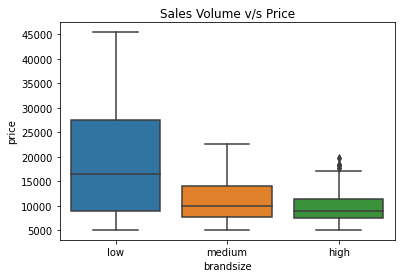

In [12]:
sns.boxplot(x = 'brandsize', y = 'price', data = CarPrice)
plt.title("Sales Volume v/s Price")
plt.show()

##### This is in line with the business understanding, high priced brands sell in low volumes

In [13]:
plotdf=CarPrice.loc[:,["price","highwaympg","citympg","peakrpm","horsepower","compressionratio","stroke",'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio']]

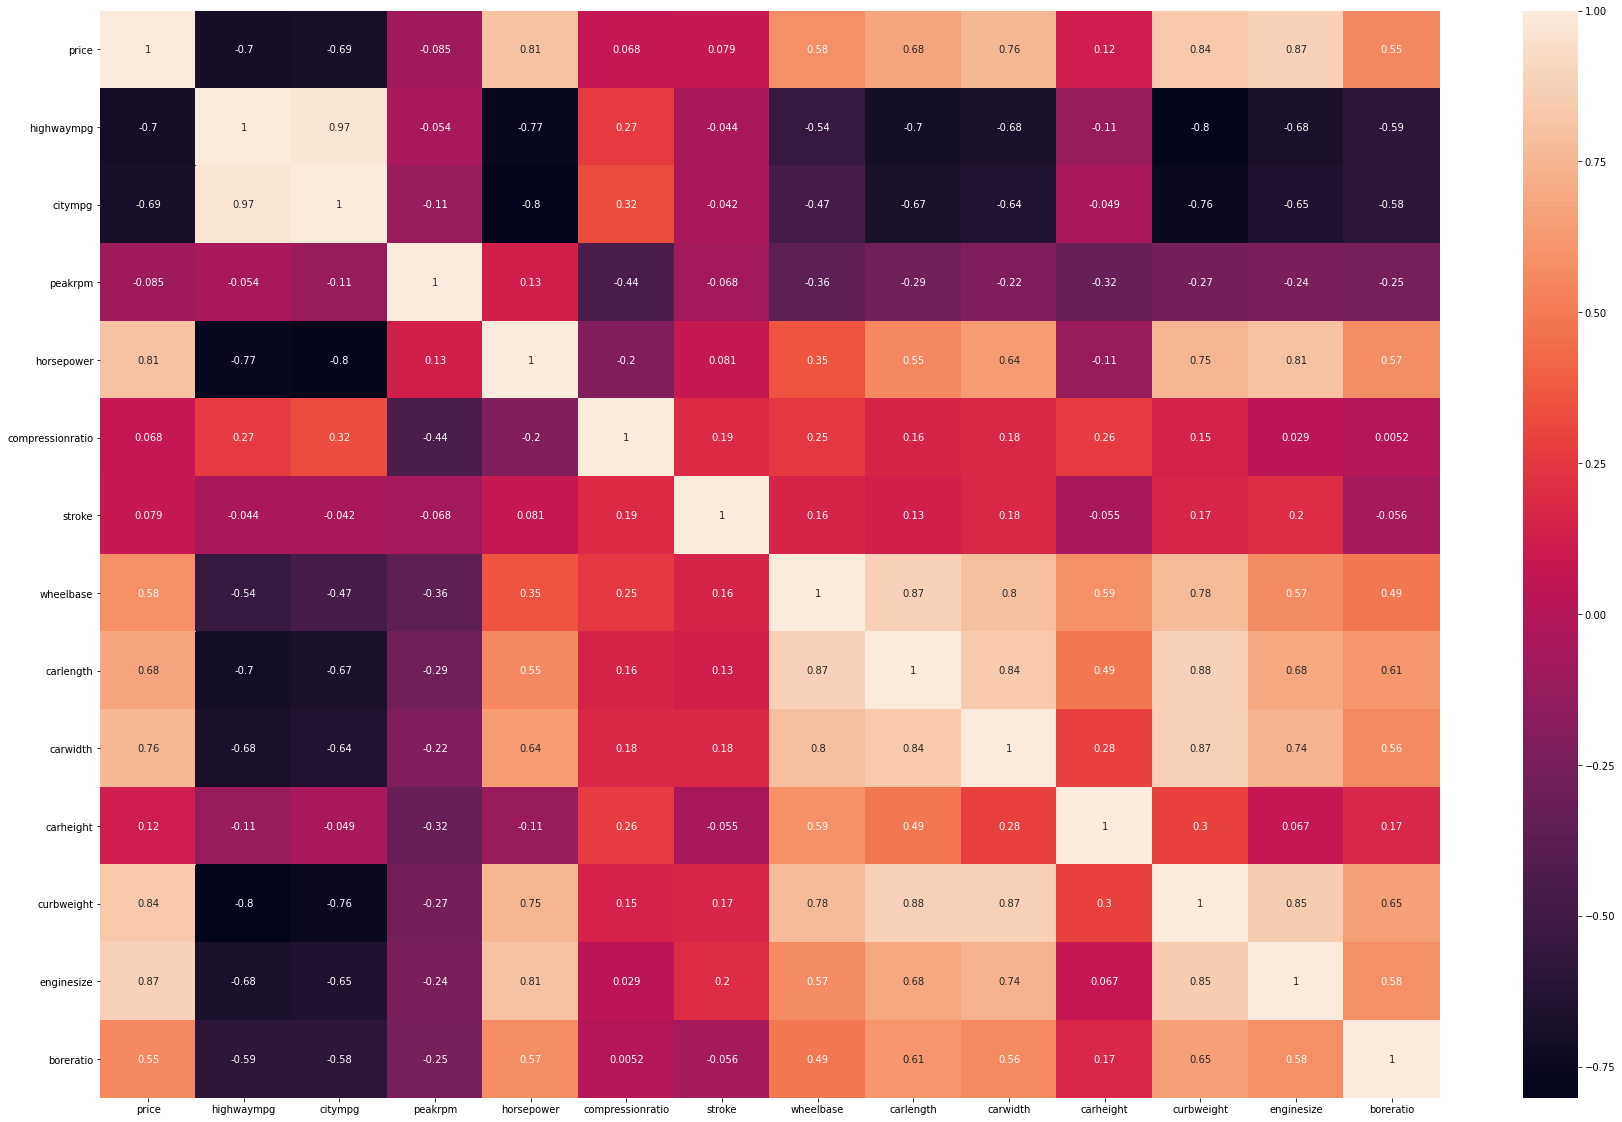

In [14]:
plt.figure(figsize=(30,20))
sns.heatmap(plotdf.corr(),annot=True)
plt.show()

##### High correlation to price
- boreratio
- engineszie
- curbweight
- carwidth
- carlength
- wheelbase
- horsepower

##### Highly Correlated features
- highwaympg & citympg (may need only one with a correlation of near 1)
- wheelbase, carlength & carwidth seem to be closely correlated (may need only one feature from this group)
- Curbweight, enginesize, boreratio also seem to have a high correlation (may need only one featre from this group)


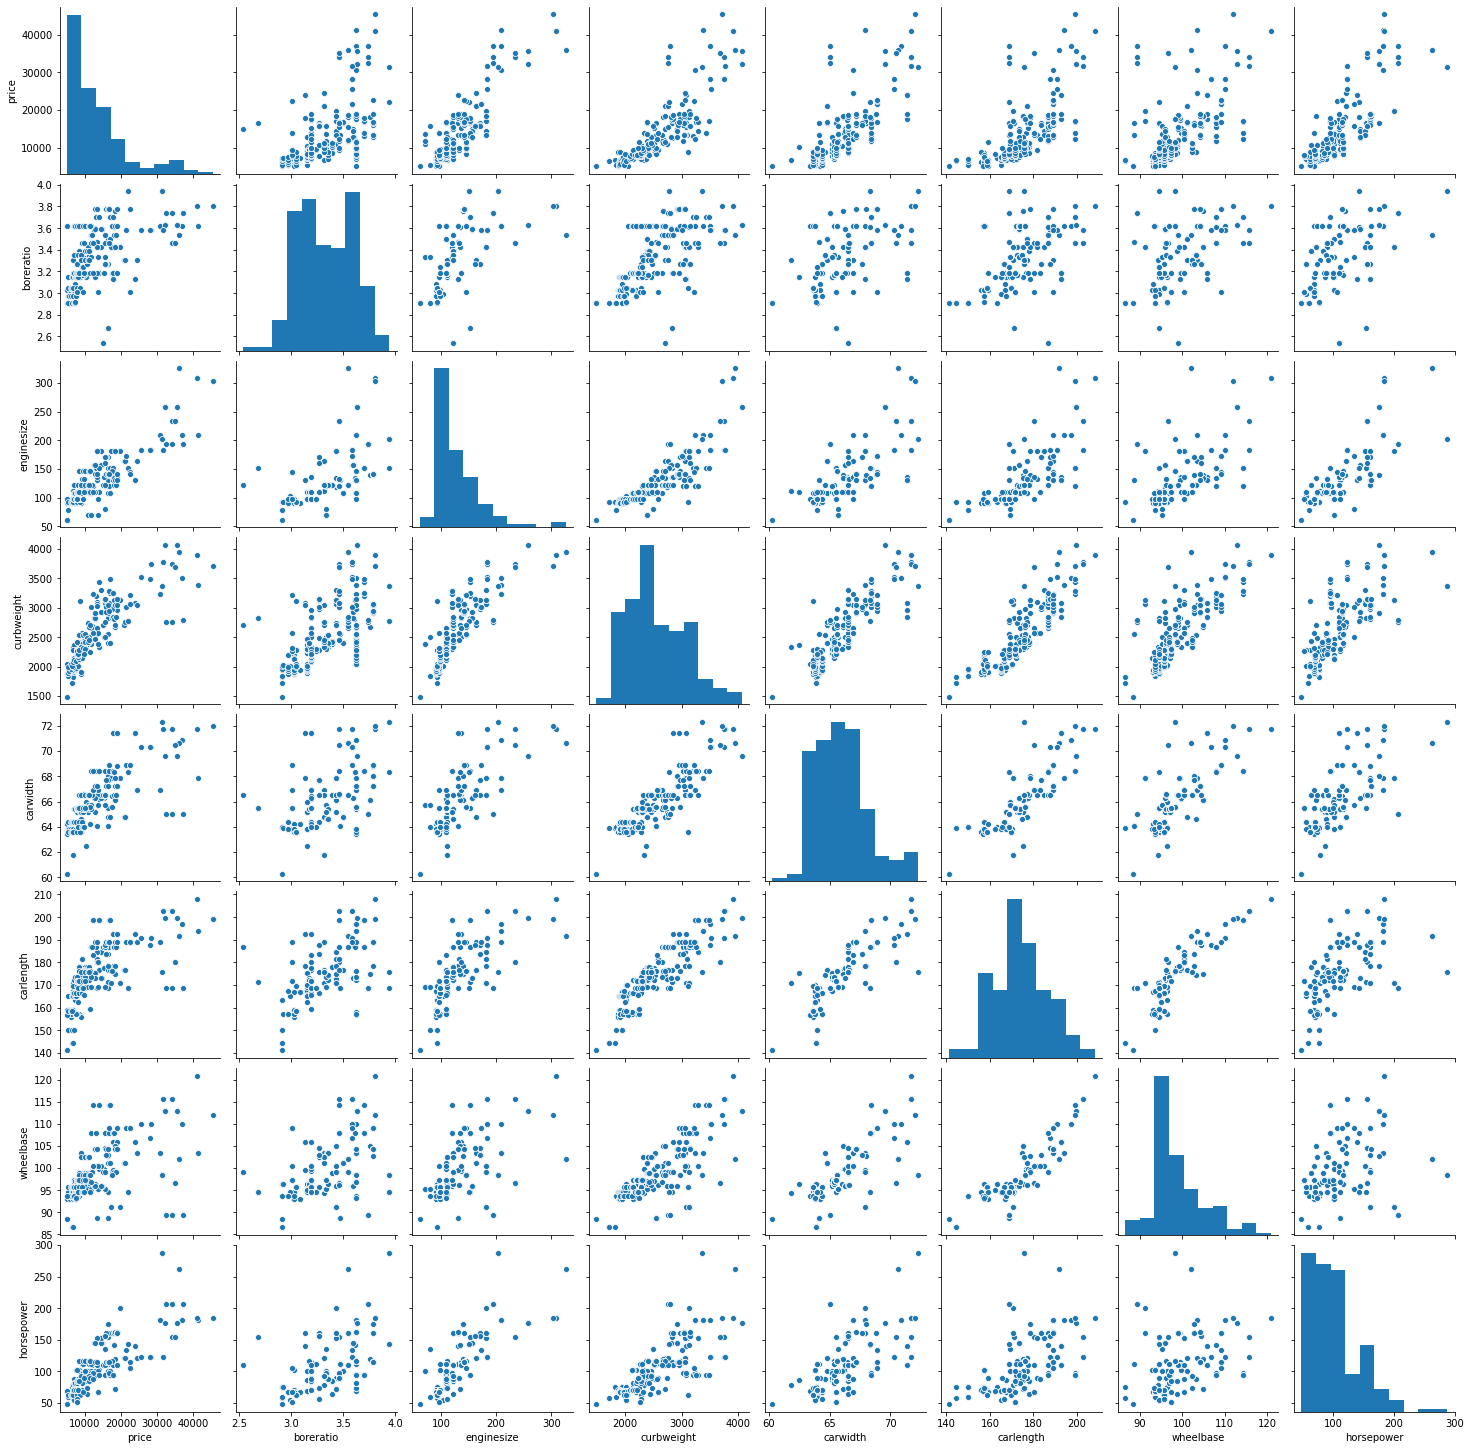

In [15]:
# Let's do a quick check to see if any of the highly correlated features have a linear relationship 
# with price

plotdf = CarPrice.loc[:,["price","boreratio",
                         "enginesize","curbweight","carwidth","carlength","wheelbase","horsepower"]]
sns.pairplot(plotdf)
plt.show()

##### Insights:
- price have a fairly linear relastionship with most of them, mainly at lower prices
- Most of the features seem dependent on each other too, we may only need one of these to explain the proce variation
- Datapoints seem lesser as the price increases.

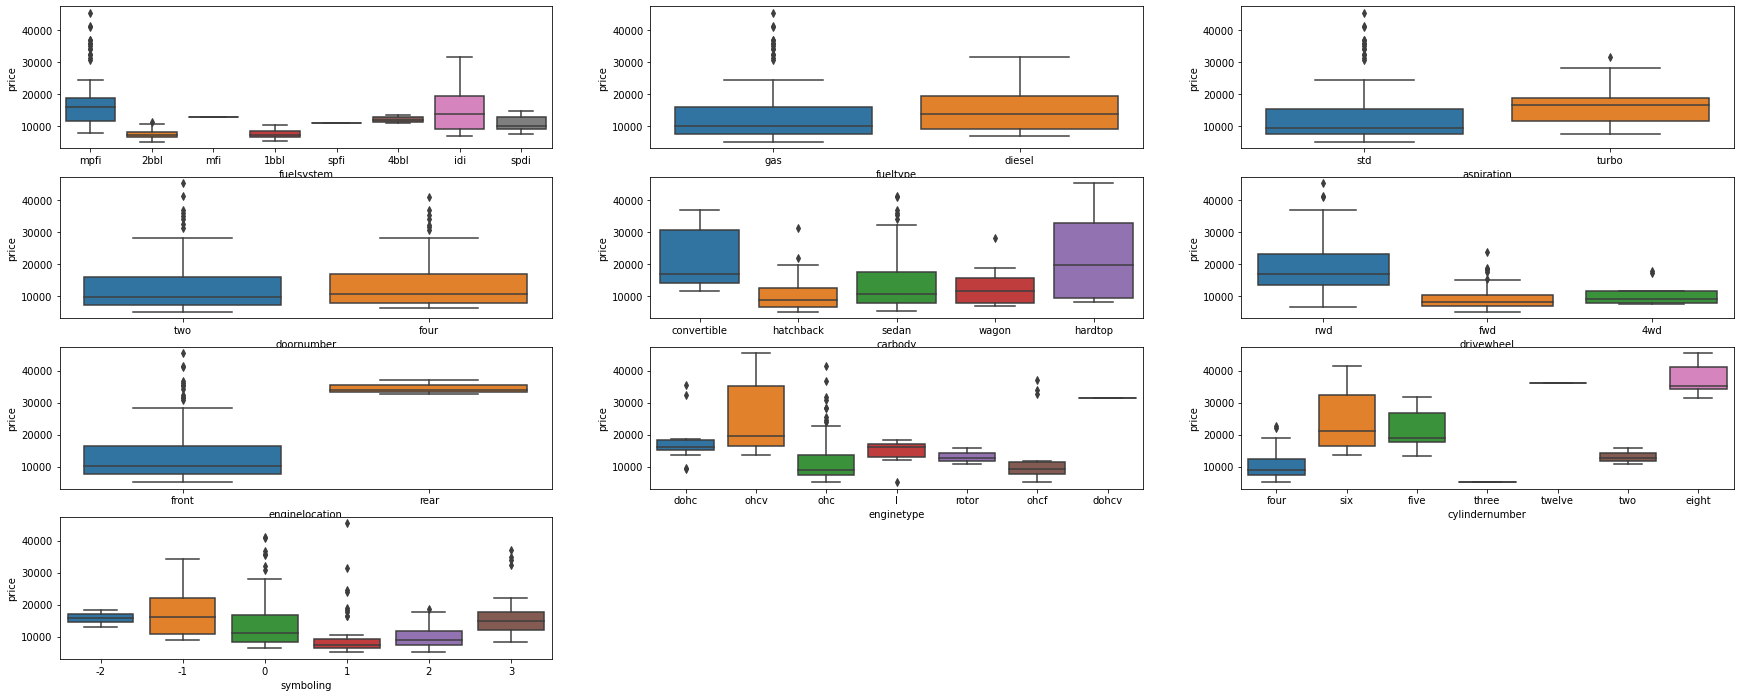

In [16]:
# Let's have some boxplots to see the releationship of categorical variables on price
# Please double-click on the plot to see it in full size
plt.figure(figsize=(30, 12))
plt.subplot(4,3,1)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice)
plt.subplot(4,3,10)
sns.boxplot(x = 'symboling', y = 'price', data = CarPrice)


plt.show()

##### Insights:

- fuelsystem - mpfi seem highest in price, but the price variation seem less across types
- fueltype - diesel type is of higher price, with morevariation in price
- aspiration - turbo is higher priced than std
- doornumber - Has no real impact on price
- carbody - hardtop & convertible have highest median price, but has a lot of variation
- drivewheel - rwd has a definite higher price than other two
- enginelocation - rear engine attracts much higher price that front
- enginetype - ohcv has a lot of variation in price, but across types the price seem not to vary much
- cylindernumber - eight cylinder is attracting higher price than others
- symboling - "1" has a lower rpice range, but the variation is not much across different segments


#### Data Preparation
- For categorical variables we will modify values by adding a prefix/suffix to interpret it easily afterwards

In [17]:
# Define a function to generate dummy variables, with drop one dummy variable
# And drop the original column from the dataframe
# For all categorical values, we will add a prefix to easily understand later
def getdummyvars(df, col, prefix):
    print(df[col].unique())
    df[col]= prefix + df[col].astype(str)
    dummyvars = pd.get_dummies(df[col], drop_first = True)
    df = pd.concat([df, dummyvars], axis = 1)
    df.drop([col], axis = 1, inplace = True)
    return(df)

In [18]:
CarPrice=getdummyvars(CarPrice, "aspiration", "aspire-")

['std' 'turbo']


In [19]:
CarPrice=getdummyvars(CarPrice, "fueltype", "fuel-")

['gas' 'diesel']


In [20]:
CarPrice=getdummyvars(CarPrice, "doornumber", "door-")

['two' 'four']


In [21]:
CarPrice=getdummyvars(CarPrice, "enginelocation", "engloc-")

['front' 'rear']


In [22]:
CarPrice=getdummyvars(CarPrice, "carbody", "body-")

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


In [23]:
CarPrice=getdummyvars(CarPrice, "drivewheel", "drive-")

['rwd' 'fwd' '4wd']


In [24]:
CarPrice=getdummyvars(CarPrice, "enginetype", "engtype-")

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


In [25]:
CarPrice=getdummyvars(CarPrice, "cylindernumber", "cyl-")

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [26]:
CarPrice=getdummyvars(CarPrice, "fuelsystem", "fuelsys-")

['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [27]:
CarPrice=getdummyvars(CarPrice, "brandsize", "brandsize-")

[low, medium, high]
Categories (3, object): [low < medium < high]


- Drop columns not necessary for analysis

In [28]:
CarPrice=CarPrice.drop(columns=["CarName","car_ID","index"])

In [29]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
 15  aspire-turbo      205 non-null    uint8  
 16  fuel-gas          205 non-null    uint8  
 1

In [30]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
# Instead of giving X_train, y_train etc, we are getting two data frames here
np.random.seed(0)
df_train, df_test = train_test_split(CarPrice, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
# pop will pop out the column from dataframe, rest of the columns will remain

# For Training data
y_train = df_train.pop('price')
X_train = df_train

# For Testing data
y_test = df_test.pop('price')
X_test = df_test

In [32]:
# Lets try a model with all columns first to see what is the maximum R-Squared 
# values we could get by using everything we have
import statsmodels.api as sm

X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     49.32
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           6.48e-51
Time:                        17:49:09   Log-Likelihood:                -1266.3
No. Observations:                 143   AIC:                             2617.
Df Residuals:                     101   BIC:                             2741.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.613e+04    1.2e+04     -3.010      0.003   -5.99e+04   -1.23e+04
symboling          242.6765    275.101      0.882      0.380    -303.050     788.403
wheelbase          160.6842    121.927      1.318      0.191     -81.187     402.556
carlength          -33.0700     58.583     -0.565      0.574    -149.283      83.143
carwidth           862.3717    302.144      2.854      0.005     262.999    1461.745
carheight          171.8529    152.891      1.124      0.264    -131.442     475.148
curbweight           1.3025      2.078      0.627      0.532      -2.821       5.426
enginesize         182.9363     45.447      4.025      0.000      92.781     273.092
boreratio        -7437.9325   2842.038     -2.617      0.010   -1.31e+04   -1800.095
stroke           -6777.7350   1493.182     -4.539      0.000   -9739.806   -3815.664
compressionratio  -345.2937    650.545     -0.531      0.597   -1635.799     945.212
horsepower          43.1213     26.402      1.633      0.106      -9.254      95.497
peakrpm              1.5008      0.733      2.047      0.043       0.047       2.955
citympg           -101.6468    166.243     -0.611      0.542    -431.428     228.134
highwaympg         148.5774    162.870      0.912      0.364    -174.514     471.668
aspire-turbo      1458.9770   1074.061      1.358      0.177    -671.670    3589.624
fuel-gas         -2.086e+04   6394.227     -3.262      0.002   -3.35e+04   -8171.866
door-two           347.0262    628.216      0.552      0.582    -899.185    1593.237
engloc-rear       5887.3312   3512.189      1.676      0.097   -1079.906    1.29e+04
body-hardtop     -4212.1030   2396.825     -1.757      0.082   -8966.759     542.553
body-hatchback   -4047.5890   1676.161     -2.415      0.018   -7372.642    -722.536
body-sedan       -3052.2961   1788.538     -1.707      0.091   -6600.274     495.682
body-wagon       -3333.3029   1912.493     -1.743      0.084   -7127.175     460.569
drive-fwd         -557.6663   1065.787     -0.523      0.602   -2671.901    1556.569
drive-rwd          897.2915   1275.891      0.703      0.484   -1633.733    3428.316
engtype-dohcv    -1403.6105   5078.456     -0.276      0.783   -1.15e+04    8670.681
engtype-l          256.9652   1999.995      0.128      0.898   -3710.487    4224.417
engtype-ohc       5431.5793   1221.128      4.448      0.000    3009.190    7853.968
engtype-ohcf      4575.6069   2223.112      2.058      0.042     165.550    8985.664
engtype-ohcv     -2482.2274   1391.662     -1.784      0.077   -5242.911     278.457
engtype-rotor     8293.5567   2903.778      2.856      0.005    2533.241    1.41e+04
cyl-five          -754.0208   3241.518     -0.233      0.817   -7184.321    5676.279
cyl-four          3277.1820   4017.366      0.816      0.417   -4692.191    1.12e+04
cyl-six            822.

- With all columns we get an adjusted R-squared of 0.933
- The model is significant from prob(F-statistic) value being very low
- But we can see there are a few features with high p-value, so there is scope for improvement here
- And we need to see multi-collinearity with VIF values as well.

In [33]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
# We will initally get columns excluded using RFE
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 5),
 ('wheelbase', False, 10),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('carheight', False, 4),
 ('curbweight', False, 14),
 ('enginesize', False, 3),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 11),
 ('peakrpm', False, 13),
 ('citympg', False, 6),
 ('highwaympg', False, 7),
 ('aspire-turbo', True, 1),
 ('fuel-gas', True, 1),
 ('door-two', True, 1),
 ('engloc-rear', True, 1),
 ('body-hardtop', True, 1),
 ('body-hatchback', True, 1),
 ('body-sedan', True, 1),
 ('body-wagon', True, 1),
 ('drive-fwd', True, 1),
 ('drive-rwd', True, 1),
 ('engtype-dohcv', True, 1),
 ('engtype-l', True, 1),
 ('engtype-ohc', True, 1),
 ('engtype-ohcf', True, 1),
 ('engtype-ohcv', True, 1),
 ('engtype-rotor', True, 1),
 ('cyl-five', False, 9),
 ('cyl-four', False, 2),
 ('cyl-six', True, 1),
 ('cyl-three', True, 1),
 ('cyl-twelve', True, 1),
 ('cyl-two', True, 1),
 ('fuelsys-2bbl', True, 1),
 ('fuelsys-4bbl', True, 1),


In [36]:
print("Supported by RFE:\n",X_train.columns[rfe.support_])
print("Not Supported by RFE:\n",X_train.columns[~rfe.support_])

Supported by RFE:
 Index(['carwidth', 'boreratio', 'stroke', 'compressionratio', 'aspire-turbo',
       'fuel-gas', 'door-two', 'engloc-rear', 'body-hardtop', 'body-hatchback',
       'body-sedan', 'body-wagon', 'drive-fwd', 'drive-rwd', 'engtype-dohcv',
       'engtype-l', 'engtype-ohc', 'engtype-ohcf', 'engtype-ohcv',
       'engtype-rotor', 'cyl-six', 'cyl-three', 'cyl-twelve', 'cyl-two',
       'fuelsys-2bbl', 'fuelsys-4bbl', 'fuelsys-idi', 'fuelsys-mpfi',
       'fuelsys-spdi', 'brandsize-low'],
      dtype='object')
Not Supported by RFE:
 Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'curbweight',
       'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'cyl-five', 'cyl-four', 'fuelsys-mfi', 'fuelsys-spfi',
       'brandsize-medium'],
      dtype='object')


In [37]:
# Now let's drop columns not supported by RFE from both Train & Test data
X_train=X_train.drop(columns=X_train.columns[~rfe.support_])
X_test=X_test.drop(columns=X_test.columns[~rfe.support_])

In [38]:
# Lets see the model
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     43.74
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.60e-48
Time:                        17:49:09   Log-Likelihood:                -1308.0
No. Observations:                 143   AIC:                             2674.
Df Residuals:                     114   BIC:                             2760.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.434e+04   1.07e+04     -5.068      0.000   -7.56e+04   -3.31e+04
carwidth          1999.6506    181.919     10.992      0.000    1639.270    2360.031
boreratio         3153.3757   1539.914      2.048      0.043     102.818    6203.934
stroke           -2499.4688   1262.421     -1.980      0.050   -5000.315       1.377
compressionratio -2374.1371    627.742     -3.782      0.000   -3617.690   -1130.584
aspire-turbo      -787.0458    913.733     -0.861      0.391   -2597.145    1023.053
fuel-gas         -4.257e+04   3478.417    -12.237      0.000   -4.95e+04   -3.57e+04
door-two           700.8796    666.815      1.051      0.295    -620.075    2021.834
engloc-rear       1.453e+04   3454.644      4.206      0.000    7687.627    2.14e+04
body-hardtop     -3007.6792   2489.083     -1.208      0.229   -7938.534    1923.175
body-hatchback   -4886.9163   1613.328     -3.029      0.003   -8082.906   -1690.926
body-sedan       -3407.0846   1688.598     -2.018      0.046   -6752.184     -61.985
body-wagon       -3292.2644   1803.359     -1.826      0.071   -6864.705     280.176
drive-fwd         -649.1105   1128.366     -0.575      0.566   -2884.396    1586.175
drive-rwd         2627.5659   1396.544      1.881      0.062    -138.977    5394.109
engtype-dohcv     4148.4990   3094.083      1.341      0.183   -1980.855    1.03e+04
engtype-l        -5750.4620   1699.541     -3.384      0.001   -9117.239   -2383.685
engtype-ohc       1180.2774   1116.104      1.057      0.293   -1030.716    3391.271
engtype-ohcf     -1926.5877   1858.324     -1.037      0.302   -5607.913    1754.738
engtype-ohcv      -927.1885   1321.254     -0.702      0.484   -3544.583    1690.206
engtype-rotor     2849.9220   1415.641      2.013      0.046      45.549    5654.295
cyl-six           5808.2668   1044.440      5.561      0.000    3739.240    7877.294
cyl-three         1.195e+04   3072.096      3.891      0.000    5866.894     1.8e+04
cyl-twelve        1.554e+04   3397.629      4.575      0.000    8811.826    2.23e+04
cyl-two           2849.9220   1415.641      2.013      0.046      45.549    5654.295
fuelsys-2bbl     -2183.6356   1072.877     -2.035      0.044   -4308.997     -58.274
fuelsys-4bbl     -6513.8380   3170.434     -2.055      0.042   -1.28e+04    -233.232
fuelsys-idi      -1.177e+04   9079.769     -1.297      0.197   -2.98e+04    6213.353
fuelsys-mpfi     -3013.8380   1196.538     -2.519      0.013   -5384.170    -643.506
fuelsys-spdi     -3171.1017   1757.383     -1.804      0.074   -6652.465     310.261
brandsize-low     3247.6512    551.752      5.886      0.000    2154.635    4340.667
==============================================================================
Omnibus:                       34.480   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.0

In [39]:
# Adjusted R-squared & prob(F-statistic) is still acceptable, let's reduce the number of features further
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
# Now let's drop columns not supported by RFE
X_train=X_train.drop(columns=X_train.columns[~rfe.support_])
X_test=X_test.drop(columns=X_test.columns[~rfe.support_])

In [41]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     64.70
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           3.93e-54
Time:                        17:49:09   Log-Likelihood:                -1316.7
No. Observations:                 143   AIC:                             2671.
Df Residuals:                     124   BIC:                             2728.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.742e+04   8628.389     -6.654      0.000   -7.45e+04   -4.03e+04
carwidth          1853.4795    155.798     11.897      0.000    1545.112    2161.847
boreratio         1125.2408   1181.860      0.952      0.343   -1213.991    3464.473
compressionratio -1642.0948    401.492     -4.090      0.000   -2436.760    -847.430
fuel-gas         -4.014e+04   2929.527    -13.703      0.000   -4.59e+04   -3.43e+04
engloc-rear       1.429e+04   3347.322      4.269      0.000    7663.425    2.09e+04
body-hardtop     -3088.8034   2288.271     -1.350      0.180   -7617.933    1440.326
body-hatchback   -4563.5107   1439.268     -3.171      0.002   -7412.226   -1714.795
body-sedan       -3286.0523   1417.105     -2.319      0.022   -6090.900    -481.205
body-wagon       -3287.5497   1528.536     -2.151      0.033   -6312.950    -262.149
drive-rwd         3993.4903    774.770      5.154      0.000    2460.003    5526.978
engtype-dohcv     4352.0970   2945.495      1.478      0.142   -1477.863    1.02e+04
engtype-l        -5997.3531   1229.958     -4.876      0.000   -8431.784   -3562.922
engtype-rotor     1844.7378   1357.877      1.359      0.177    -842.880    4532.356
cyl-six           4150.5776    864.132      4.803      0.000    2440.218    5860.938
cyl-three         1.067e+04   3080.837      3.464      0.001    4575.305    1.68e+04
cyl-twelve        1.374e+04   2996.978      4.584      0.000    7806.433    1.97e+04
cyl-two           1844.7378   1357.877      1.359      0.177    -842.880    4532.356
fuelsys-4bbl     -3500.0000   2992.578     -1.170      0.244   -9423.150    2423.150
fuelsys-idi      -1.727e+04   6586.953     -2.622      0.010   -3.03e+04   -4234.670
brandsize-low     3158.7738    538.634      5.864      0.000    2092.666    4224.882
==============================================================================
Omnibus:                       54.103   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.246
Skew:                           1.169   Prob(JB):                     4.75e-70
Kurtosis:                       9.936   Cond. No.                     3.49e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.24e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
# We still have around 0.89 Adjusted R-squared, we will drop few more features before 
# doing a manual analysis
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
# Now let's drop columns not supported by RFE
X_train=X_train.drop(columns=X_train.columns[~rfe.support_])
X_test=X_test.drop(columns=X_test.columns[~rfe.support_])

In [44]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     72.54
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           8.84e-54
Time:                        17:49:09   Log-Likelihood:                -1327.5
No. Observations:                 143   AIC:                             2685.
Df Residuals:                     128   BIC:                             2729.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.28e+05   8825.513    -14.508      0.000   -1.46e+05   -1.11e+05
carwidth        2157.3137    136.643     15.788      0.000    1886.943    2427.684
engloc-rear     1.483e+04   3492.087      4.246      0.000    7916.617    2.17e+04
body-hardtop   -3828.5667   2417.605     -1.584      0.116   -8612.212     955.078
body-hatchback -4615.6602   1514.891     -3.047      0.003   -7613.132   -1618.189
body-sedan     -3510.0446   1491.880     -2.353      0.020   -6461.985    -558.104
body-wagon     -3467.6452   1614.779     -2.147      0.034   -6662.761    -272.530
drive-rwd       4038.5902    754.161      5.355      0.000    2546.354    5530.827
engtype-l      -4494.0612   1224.970     -3.669      0.000   -6917.874   -2070.248
engtype-rotor   1265.7424   1431.838      0.884      0.378   -1567.393    4098.878
cyl-six         3627.1512    862.913      4.203      0.000    1919.730    5334.572
cyl-three       9035.5777   3222.845      2.804      0.006    2658.628    1.54e+04
cyl-twelve      8025.9797   2862.478      2.804      0.006    2362.078    1.37e+04
cyl-two         1265.7424   1431.838      0.884      0.378   -1567.393    4098.878
fuelsys-4bbl   -3500.0000   3176.663     -1.102      0.273   -9785.571    2785.571
brandsize-low   3184.0524    553.308      5.755      0.000    2089.237    4278.868
==============================================================================
Omnibus:                       57.292   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              401.745
Skew:                           1.190   Prob(JB):                     5.78e-88
Kurtosis:                      10.859   Cond. No.                     5.06e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.42e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
# Lets do a manual analysis of the rest of the columns, we will keep track of the columns droped 
# through the list variable below
dropcollist=[]

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,engtype-rotor,inf
12,cyl-two,inf
0,carwidth,44.08
4,body-sedan,19.98
3,body-hatchback,14.76
5,body-wagon,6.53
13,fuelsys-4bbl,4.00
6,drive-rwd,3.33
2,body-hardtop,2.29
9,cyl-six,1.85


In [48]:
# Dropping "engtype-rotor" as it has VIF=inf and p-value = 0.378
X_train=X_train.drop(columns="engtype-rotor")
dropcollist.append("engtype-rotor")

In [49]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     72.54
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           8.84e-54
Time:                        17:49:09   Log-Likelihood:                -1327.5
No. Observations:                 143   AIC:                             2685.
Df Residuals:                     128   BIC:                             2729.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.28e+05   8825.513    -14.508      0.000   -1.46e+05   -1.11e+05
carwidth        2157.3137    136.643     15.788      0.000    1886.943    2427.684
engloc-rear     1.483e+04   3492.087      4.246      0.000    7916.617    2.17e+04
body-hardtop   -3828.5667   2417.605     -1.584      0.116   -8612.212     955.078
body-hatchback -4615.6602   1514.891     -3.047      0.003   -7613.132   -1618.189
body-sedan     -3510.0446   1491.880     -2.353      0.020   -6461.985    -558.104
body-wagon     -3467.6452   1614.779     -2.147      0.034   -6662.761    -272.530
drive-rwd       4038.5902    754.161      5.355      0.000    2546.354    5530.827
engtype-l      -4494.0612   1224.970     -3.669      0.000   -6917.874   -2070.248
cyl-six         3627.1512    862.913      4.203      0.000    1919.730    5334.572
cyl-three       9035.5777   3222.845      2.804      0.006    2658.628    1.54e+04
cyl-twelve      8025.9797   2862.478      2.804      0.006    2362.078    1.37e+04
cyl-two         2531.4848   2863.676      0.884      0.378   -3134.787    8197.756
fuelsys-4bbl   -3500.0000   3176.663     -1.102      0.273   -9785.571    2785.571
brandsize-low   3184.0524    553.308      5.755      0.000    2089.237    4278.868
==============================================================================
Omnibus:                       57.292   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              401.745
Skew:                           1.190   Prob(JB):                     5.78e-88
Kurtosis:                      10.859   Cond. No.                     2.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# No significant change in adjusted R squared (0.876), F-statistic prob is still low 
# indicating the model is significant
# Let's see the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,44.08
4,body-sedan,19.98
3,body-hatchback,14.76
5,body-wagon,6.53
11,cyl-two,4.33
12,fuelsys-4bbl,4.00
6,drive-rwd,3.33
2,body-hardtop,2.29
8,cyl-six,1.85
13,brandsize-low,1.84


In [51]:
# "body-wagon" has a higher p-value, compared to others, and a VIF > 5. Let's try dropping it
# carwidth has a high VIF, but p-value is close to zero, we will see if it changes after this step
X_train=X_train.drop(columns="body-wagon")
dropcollist.append("body-wagon")

In [52]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     75.65
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           9.32e-54
Time:                        17:49:09   Log-Likelihood:                -1330.0
No. Observations:                 143   AIC:                             2688.
Df Residuals:                     129   BIC:                             2730.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.289e+05   8939.979    -14.414      0.000   -1.47e+05   -1.11e+05
carwidth        2124.3701    137.666     15.431      0.000    1851.994    2396.746
engloc-rear     1.478e+04   3540.561      4.174      0.000    7773.852    2.18e+04
body-hardtop   -1094.3980   2083.740     -0.525      0.600   -5217.129    3028.333
body-hatchback -1758.9943    734.847     -2.394      0.018   -3212.907    -305.082
body-sedan      -653.3686    684.735     -0.954      0.342   -2008.133     701.395
drive-rwd       4457.6578    738.602      6.035      0.000    2996.315    5919.001
engtype-l      -4933.7362   1224.528     -4.029      0.000   -7356.495   -2510.978
cyl-six         3278.9641    859.325      3.816      0.000    1578.768    4979.161
cyl-three       9221.4333   3266.469      2.823      0.006    2758.644    1.57e+04
cyl-twelve      7692.4018   2897.994      2.654      0.009    1958.650    1.34e+04
cyl-two         2232.3973   2900.049      0.770      0.443   -3505.421    7970.215
fuelsys-4bbl   -3500.0000   3220.823     -1.087      0.279   -9872.478    2872.478
brandsize-low   3379.9564    553.323      6.108      0.000    2285.194    4474.719
==============================================================================
Omnibus:                       55.129   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.572
Skew:                           1.174   Prob(JB):                     9.12e-76
Kurtosis:                      10.245   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Adjusted R-squared changed from 0.876 to 0.872, which we can live with.
# Let's see the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,7.46
10,cyl-two,4.32
4,body-sedan,4.10
11,fuelsys-4bbl,4.00
3,body-hatchback,3.37
5,drive-rwd,3.05
7,cyl-six,1.79
12,brandsize-low,1.78
6,engtype-l,1.70
2,body-hardtop,1.66


In [54]:
# Now Cyl-two and body-sedan has high p-values, we will try dropping cyl-two. though VIFs are <5.
# carwidth is a more visible feature to customers,with a low p-value,
# and we still have a cylinder related feature in the model.
X_train=X_train.drop(columns="cyl-two")
dropcollist.append("cyl-two")

In [55]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     82.16
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.34e-54
Time:                        17:49:10   Log-Likelihood:                -1330.4
No. Observations:                 143   AIC:                             2687.
Df Residuals:                     130   BIC:                             2725.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.286e+05   8918.730    -14.417      0.000   -1.46e+05   -1.11e+05
carwidth        2119.8885    137.327     15.437      0.000    1848.203    2391.574
engloc-rear     1.485e+04   3533.784      4.202      0.000    7859.511    2.18e+04
body-hardtop   -1143.9672   2079.478     -0.550      0.583   -5257.967    2970.032
body-hatchback -1699.4884    729.624     -2.329      0.021   -3142.961    -256.016
body-sedan      -641.5268    683.488     -0.939      0.350   -1993.726     710.673
drive-rwd       4582.9244    719.323      6.371      0.000    3159.830    6006.019
engtype-l      -5036.8141   1215.276     -4.145      0.000   -7441.091   -2632.537
cyl-six         3188.2841    849.878      3.751      0.000    1506.902    4869.666
cyl-three       9300.6995   3259.725      2.853      0.005    2851.723    1.57e+04
cyl-twelve      7637.1474   2892.561      2.640      0.009    1914.561    1.34e+04
fuelsys-4bbl   -1434.8295   1779.406     -0.806      0.422   -4955.171    2085.512
brandsize-low   3337.6077    549.717      6.071      0.000    2250.057    4425.158
==============================================================================
Omnibus:                       54.791   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.278
Skew:                           1.168   Prob(JB):                     1.29e-74
Kurtosis:                      10.187   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
# Prob (F-statistic) is lower, Adjusted R squared increased, 
# There are still two features with high p-value indicating less significance
# Let's see the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,7.45
4,body-sedan,4.09
3,body-hatchback,3.33
5,drive-rwd,2.90
11,brandsize-low,1.76
7,cyl-six,1.75
6,engtype-l,1.68
2,body-hardtop,1.66
1,engloc-rear,1.60
8,cyl-three,1.28


In [57]:
# body-hardtop has a high p-value, though VIF is low, we will try dropping it 
# as other body related features are still present
X_train=X_train.drop(columns="body-hardtop")
dropcollist.append("body-hardtop")

In [58]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     90.08
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.60e-55
Time:                        17:49:10   Log-Likelihood:                -1330.5
No. Observations:                 143   AIC:                             2685.
Df Residuals:                     131   BIC:                             2721.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.29e+05   8859.484    -14.563      0.000   -1.47e+05   -1.11e+05
carwidth        2125.2030    136.622     15.555      0.000    1854.932    2395.474
engloc-rear     1.379e+04   2952.727      4.670      0.000    7948.106    1.96e+04
body-hatchback -1608.1543    708.589     -2.270      0.025   -3009.913    -206.395
body-sedan      -557.5982    664.468     -0.839      0.403   -1872.074     756.878
drive-rwd       4534.6359    712.044      6.368      0.000    3126.042    5943.229
engtype-l      -4966.6586   1205.345     -4.121      0.000   -7351.118   -2582.199
cyl-six         3223.4103    845.217      3.814      0.000    1551.369    4895.452
cyl-three       9233.6176   3248.762      2.842      0.005    2806.791    1.57e+04
cyl-twelve      7641.1765   2884.843      2.649      0.009    1934.270    1.33e+04
fuelsys-4bbl   -1389.2702   1772.740     -0.784      0.435   -4896.173    2117.632
brandsize-low   3360.5027    546.679      6.147      0.000    2279.042    4441.964
==============================================================================
Omnibus:                       54.139   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.109
Skew:                           1.152   Prob(JB):                     2.81e-73
Kurtosis:                      10.125   Cond. No.                     2.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# prob(F-statistic) improved, Adjusted-R squared is same
# Let's drop fuelsys-4bbl now, as it seem less significant with hghest p-value
X_train=X_train.drop(columns="fuelsys-4bbl")
dropcollist.append("fuelsys-4bbl")
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     99.32
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.12e-56
Time:                        17:49:10   Log-Likelihood:                -1330.9
No. Observations:                 143   AIC:                             2684.
Df Residuals:                     132   BIC:                             2716.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.294e+05   8832.269    -14.652      0.000   -1.47e+05   -1.12e+05
carwidth        2131.6976    136.171     15.655      0.000    1862.338    2401.057
engloc-rear     1.375e+04   2947.983      4.664      0.000    7918.566    1.96e+04
body-hatchback -1705.1076    696.686     -2.447      0.016   -3083.220    -326.995
body-sedan      -581.2447    662.811     -0.877      0.382   -1892.351     729.862
drive-rwd       4346.4623    669.357      6.493      0.000    3022.408    5670.517
engtype-l      -4813.8302   1187.725     -4.053      0.000   -7163.268   -2464.393
cyl-six         3359.6172    825.945      4.068      0.000    1725.817    4993.418
cyl-three       9116.9630   3240.603      2.813      0.006    2706.729    1.55e+04
cyl-twelve      7725.3223   2878.627      2.684      0.008    2031.113    1.34e+04
brandsize-low   3423.6834    539.911      6.341      0.000    2355.687    4491.680
==============================================================================
Omnibus:                       53.450   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.123
Skew:                           1.142   Prob(JB):                     1.13e-70
Kurtosis:                       9.989   Cond. No.                     2.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# body-sedan is also of low significance still, with a p-value of 0.382
# We will drop it next and see how our model behave
X_train=X_train.drop(columns="body-sedan")
dropcollist.append("body-sedan")
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.86e-57
Time:                        17:49:10   Log-Likelihood:                -1331.3
No. Observations:                 143   AIC:                             2683.
Df Residuals:                     133   BIC:                             2712.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.291e+05   8818.608    -14.643      0.000   -1.47e+05   -1.12e+05
carwidth        2121.0250    135.508     15.652      0.000    1852.995    2389.055
engloc-rear     1.422e+04   2896.855      4.908      0.000    8487.630    1.99e+04
body-hatchback -1288.3884    509.026     -2.531      0.013   -2295.221    -281.556
drive-rwd       4403.4011    665.622      6.615      0.000    3086.827    5719.975
engtype-l      -4789.4469   1186.368     -4.037      0.000   -7136.037   -2442.857
cyl-six         3296.8342    822.121      4.010      0.000    1670.710    4922.958
cyl-three       9087.3844   3237.613      2.807      0.006    2683.512    1.55e+04
cyl-twelve      7608.5906   2873.050      2.648      0.009    1925.809    1.33e+04
brandsize-low   3370.4447    536.021      6.288      0.000    2310.217    4430.673
==============================================================================
Omnibus:                       52.881   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.811
Skew:                           1.148   Prob(JB):                     2.90e-66
Kurtosis:                       9.737   Cond. No.                     2.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# This looks like a significant model with low p-values for all features
# Adjusted R-squared around same as earlier
# Prob(F-statistic) is lower than before indicating significance of the model
# Let's try VIFs again to see if they are acceptable
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,2.75
3,drive-rwd,2.52
8,brandsize-low,1.68
5,cyl-six,1.65
2,body-hatchback,1.61
4,engtype-l,1.60
6,cyl-three,1.27
1,engloc-rear,1.07
7,cyl-twelve,1.05


In [62]:
# VIFs are all in acceptable range with most of the less than 2, and the above 2 are still less than 5
# Let's validate the model now.

#### Residual Analysis of train data

In [63]:
y_train_pred = lr_model.predict(X_train_sm)

Text(0.5, 0, 'Residuals')

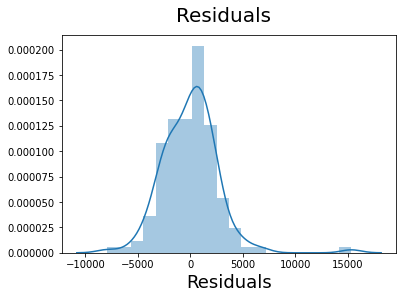

In [64]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Residuals', fontsize = 20)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 18)   

- <b> Residuals seem normally distributed centered around zero mean </b>

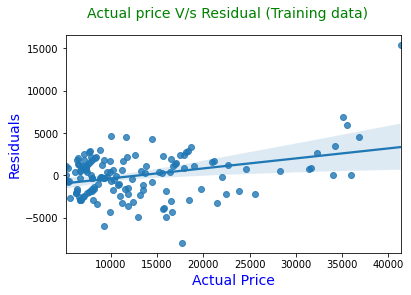

In [65]:
fig = plt.figure()
sns.regplot(y_train,(y_train - y_train_pred))
fig.suptitle('Actual price V/s Residual (Training data)', fontsize = 14, color="Green")                  # Plot heading 
plt.xlabel('Actual Price', fontsize = 14, color="blue")  
plt.ylabel('Residuals', fontsize = 14, color="blue")
plt.show()

- <b> Variance of Residuals seem constant except a couple of outliers<b>

- As we can see there is an outlier towards the extreme right that is adding a slight skew in the plot
- Let's see he effect - if we remove the data from higer price range where we have outliers. 

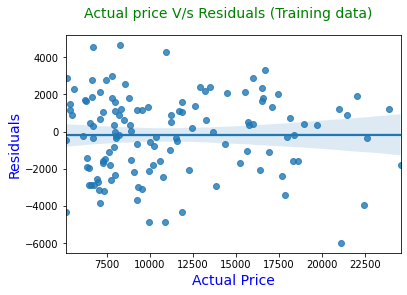

In [66]:
noout=y_train.loc[y_train<25500]
noout_pred=y_train_pred.loc[y_train_pred<24500]
fig=plt.figure()
sns.regplot(noout,(noout - noout_pred))
fig.suptitle('Actual price V/s Residuals (Training data)', fontsize = 14, color="Green")                  # Plot heading 
plt.xlabel('Actual Price', fontsize = 14, color="blue")  
plt.ylabel('Residuals', fontsize = 14, color="blue")
plt.show()

- <b> Without outliers, Residuals seem randomly dstributed around mean zero<b>

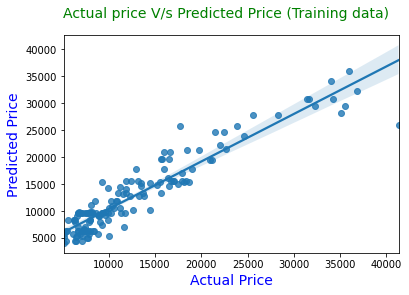

In [67]:
# Let's see how our model is able to predict values with Training data
fig = plt.figure()
sns.regplot(y_train,y_train_pred)
fig.suptitle('Actual price V/s Predicted Price (Training data)', fontsize = 14, color="Green")                  # Plot heading 
plt.xlabel('Actual Price', fontsize = 14, color="blue")  
plt.ylabel('Predicted Price', fontsize = 14, color="blue")
plt.show()

- <b> We are able to predict the values well, except an outlier<b>

In [68]:
# Drop columns from test data for applying our model
X_test=X_test.drop(columns=dropcollist)

In [69]:
# Add constant for using statsmodel
X_test_sm = sm.add_constant(X_test)

In [70]:
# Use test data to predict the price using our model
y_test_pred=lr_model.predict(X_test_sm)

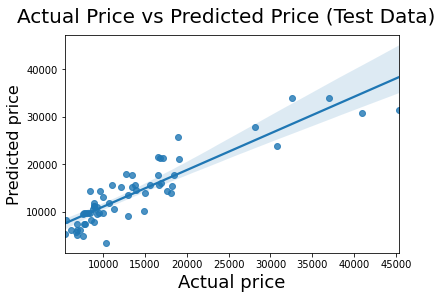

In [71]:
# Lets plot the Actual v/s predicted values for test data
fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('Actual Price vs Predicted Price (Test Data)', fontsize = 20)              # Plot heading 
plt.xlabel('Actual price', fontsize = 18)                          # X-label
plt.ylabel('Predicted price', fontsize = 16) 
plt.show()

- <b> Our model is fairly accurate from what we see from the plot</b>

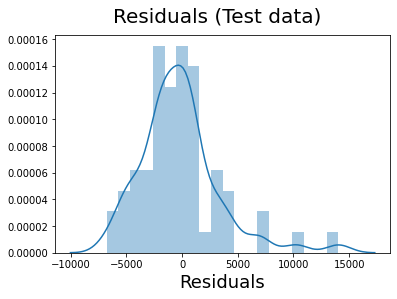

In [72]:
# Residual distribution with test data
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Residuals (Test data)', fontsize = 20)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 18)   
plt.show()

- <b> This is very similar to a normal distribution centered around zero mean </b>

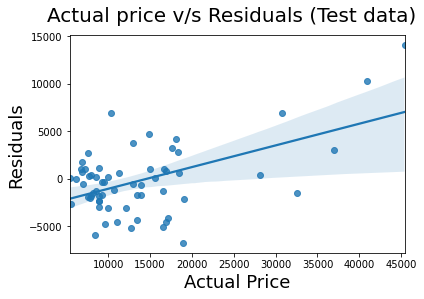

In [73]:
fig = plt.figure()
sns.regplot(y_test,(y_test - y_test_pred))
fig.suptitle('Actual price v/s Residuals (Test data)', fontsize = 20)                  # Plot heading 
plt.xlabel('Actual Price', fontsize = 18)  
plt.ylabel('Residuals', fontsize = 18)   
plt.show()

- <b> Here we see a high variation than train data for residuals, but, there are a few outliers </b>
- Lets try plotting the error terms for lower price levels alone

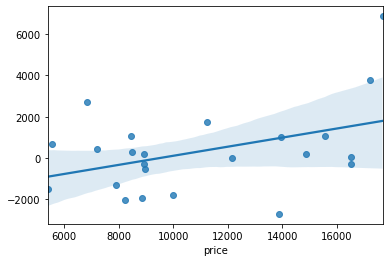

In [74]:
noout=y_test.loc[y_test<18000]
noout_pred=y_test_pred.loc[y_test_pred<10000]
sns.regplot(noout,(noout - noout_pred))
plt.ytitle="Error terms"
plt.show()

- The variation is reduced and the error terms are more random now. 
- This indicate we may need more observations, especially at higherprice level

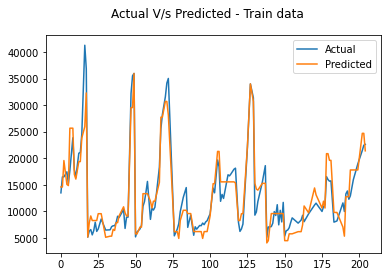

In [75]:
# Lets see a plot with predicted an actual values to compare
# This is for train data
plt.figure()
sns.lineplot(data=y_train,label="Actual")
sns.lineplot(data=y_train_pred, label="Predicted")
plt.suptitle("Actual V/s Predicted - Train data")
plt.legend()
plt.show()

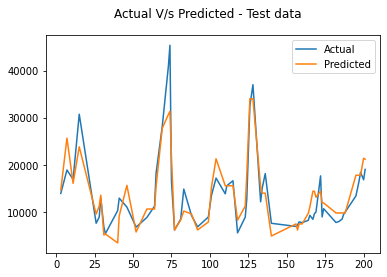

In [76]:
# Lets see a plot with predicted an actual values to compare
# This is for test data
plt.figure()
sns.lineplot(data=y_test,label="Actual")
sns.lineplot(data=y_test_pred, label="Predicted")
plt.suptitle("Actual V/s Predicted - Test data")
plt.legend()
plt.show()

 - In both cases we have captured the trends fairly well without overfitting the model.
 

#### R-squared value as required for the assignment, for the test data

In [77]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.811973633596446

- <b> Let's take a look at the coefficients of the features we have in the model

<left<table>    
<tr><td><b>Feature</b></td><td> <b>Co-efficient</b></td></tr>    
<tr><td>carwidth</td><td> 2121.0250</td></tr>
<tr><td>engloc-rear </td><td>1.422e+04</td></tr>
<tr><td>body-hatchback </td><td>-1288.3884</td></tr>
<tr><td>drive-rwd</td><td> 4403.4011</td></tr>
<tr><td>engtype-l</td><td> -4789.4469</td></tr>
<tr><td>cyl-six </td><td>3296.8342</td></tr>
<tr><td>cyl-three</td><td> 9087.3844</td></tr>
<tr><td>cyl-twelve </td><td>7608.5906</td></tr>
<tr><td>brandsize-low </td><td>3370.4447</td></tr>
</table>

##### Business Summary of the model
- Hatchback body seem to affect the price negatively
- Similarly enginetype "l" is affecting the price negatively
- if the engine location is rear, the price is significantly increased
- rear wheel drive has a positive impact on the price as well
- Number of cylinders being 3, 6 or 12 have a positive impact on price, 3 cylinder having the highest positive impact
- car width is also having a positive impact on price
- Brands with low volume of sales are selling at a higher price